## 1. Problem Statement
We aim to discover meaningful associations between products that can support cross-selling and recommendation strategies.

## 2. Data Preparation
Load transactional data and ensure each customer–item pair is unique.
Dataset：Chinese_Bakery

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
from mlxtend.frequent_patterns import (apriori, association_rules)
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

Chinese_Bakery = pandas.read_csv('./Assets/Chinese_Bakery.csv')
Chinese_Bakery

ModuleNotFoundError: No module named 'matplotlib'

## 3. Transaction Encoding
Convert transactions into a one-hot encoded matrix suitable for the Apriori algorithm.

In [43]:
ListItem=Chinese_Bakery.groupby(['Customer'])['Item'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(ListItem).transform(ListItem)
ItemIndicator = pandas.DataFrame(te_ary, columns=te.columns_)
nCustomer, nProduct = ItemIndicator.shape
ItemIndicator

,BBQ Pork Bun,Bean Paste Bun,Coconut Cocktail Bun,Coconut Sweet Top Bun,Coconut Tart,Coconut Twist Bun,Coffee,Egg Custard Tart,Egg Custard w/ Sweet Top Bun,Ham & Egg Bun,Milk Tea (Hot),Pineapple Sweet Top Bun,Plain Dinner Rolls,Portuguese-Style Milk Egg Tart,Sponge Cake,Steamed Rice Cake (Brown or White Sugar)
0,True,True,False,False,False,True,True,True,True,True,False,True,True,False,True,True
1,True,True,True,True,True,True,False,False,True,True,True,False,False,False,True,False
2,False,True,True,False,False,False,False,True,True,False,False,True,True,True,False,False
3,True,True,True,False,False,False,False,True,False,False,False,False,True,True,False,False
4,True,True,False,False,False,True,True,False,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,True,False,True,False,True,True,False,True,False,True,True,False,True,False,False,False
991,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False
992,True,False,False,True,False,False,False,True,True,True,False,False,True,False,False,False
993,True,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False


## 4. Frequent Itemset Mining
Apply the Apriori algorithm with a minimum support threshold to identify frequent itemsets.

In [20]:
#  How many products each customer purchased
basket_size = Chinese_Bakery.groupby("Customer")["Item"].nunique()
basket_size

Customer
1       11
2       10
3        7
4        6
5       10
        ..
996      8
997      5
998      6
999      6
1000    10
Name: Item, Length: 995, dtype: int64

In [21]:
# Number of customers who purchased k items
freq_table = basket_size.value_counts().sort_index()
freq_table

2      28
3      26
4      95
5      95
6     175
7     136
8     167
9     108
10    101
11     44
12     17
13      2
14      1
Name: Item, dtype: int64

In [23]:
#caculate median number
cum_freq = freq_table.cumsum()
cum_freq

2      28
3      54
4     149
5     244
6     419
7     555
8     722
9     830
10    931
11    975
12    992
13    994
14    995
Name: Item, dtype: int64

So median_size is 7,so max_size(max_len)=mediansize+1=8

In [26]:
"""Use apriori indentify frequent itemsets"""
frequent_itemsets = apriori(
    ItemIndicator,
    min_support=0.3,
    max_len=8,
    use_colnames=True
)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.701508,(BBQ Pork Bun),1
1,0.642211,(Bean Paste Bun),1
2,0.573869,(Coconut Cocktail Bun),1
3,0.469347,(Coconut Sweet Top Bun),1
4,0.460302,(Coconut Twist Bun),1
5,0.342714,(Coffee),1
6,0.434171,(Egg Custard Tart),1
7,0.514573,(Egg Custard w/ Sweet Top Bun),1
8,0.699497,(Ham & Egg Bun),1
9,0.585930,(Pineapple Sweet Top Bun),1


## 5. Association Rule Generation
Generate association rules using a minimum confidence threshold to ensure directional reliability.

In [32]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.5
)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bean Paste Bun),(BBQ Pork Bun),0.642211,0.701508,0.465327,0.724570,1.032875,0.014811,1.083731
1,(BBQ Pork Bun),(Bean Paste Bun),0.701508,0.642211,0.465327,0.663324,1.032875,0.014811,1.062709
2,(Coconut Cocktail Bun),(BBQ Pork Bun),0.573869,0.701508,0.414070,0.721541,1.028558,0.011497,1.071945
3,(BBQ Pork Bun),(Coconut Cocktail Bun),0.701508,0.573869,0.414070,0.590258,1.028558,0.011497,1.039997
4,(Coconut Sweet Top Bun),(BBQ Pork Bun),0.469347,0.701508,0.327638,0.698073,0.995104,-0.001612,0.988624
5,(Coconut Twist Bun),(BBQ Pork Bun),0.460302,0.701508,0.326633,0.709607,1.011546,0.003728,1.027891
6,(Egg Custard Tart),(BBQ Pork Bun),0.434171,0.701508,0.321608,0.740741,1.055927,0.017034,1.151328
7,(BBQ Pork Bun),(Egg Custard w/ Sweet Top Bun),0.701508,0.514573,0.364824,0.520057,1.010658,0.003847,1.011427
8,(Egg Custard w/ Sweet Top Bun),(BBQ Pork Bun),0.514573,0.701508,0.364824,0.708984,1.010658,0.003847,1.025692
9,(Ham & Egg Bun),(BBQ Pork Bun),0.699497,0.701508,0.494472,0.706897,1.007682,0.003770,1.018386


## 6. Rule Evaluation and Visualization
Visualize the relationship between support and confidence, with lift represented by color.


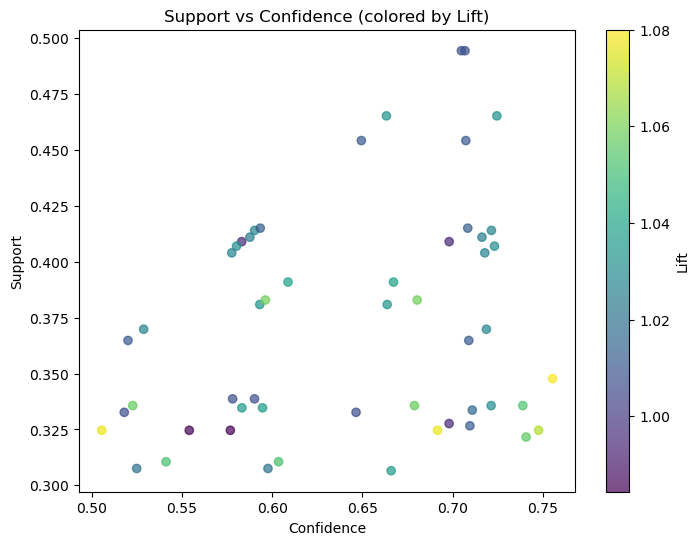

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    rules["confidence"],
    rules["support"],
    c=rules["lift"],
    cmap="viridis",
    alpha=0.7
)

plt.colorbar(scatter, label="Lift")
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.title("Support vs Confidence (colored by Lift)")
plt.show()

From the scatterplot, rules located in the upper-right region exhibit both relatively high support and confidence, indicating that these associations are not only reliable but also common across transactions. Given that lift values are consistently close to one, support and confidence play a more important role in identifying practically useful rules in this dataset.

## 7. High Support and High Confidence Rules
Translate the upper-right region of the scatterplot into concrete association rules.


In [37]:
high_sc_rules = rules[(rules['support'] >= 0.475) & (rules['confidence'] >= 0.7) & (rules['lift'] > 1)]
high_sc_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
9,(Ham & Egg Bun),(BBQ Pork Bun),0.494472,0.706897,1.007682
10,(BBQ Pork Bun),(Ham & Egg Bun),0.494472,0.704871,1.007682


## 8Identify which product combinations most strongly promote the purchase of Ham & Egg Bun

In [39]:
rules_he = rules[
    rules["consequents"] == frozenset({"Ham & Egg Bun"})
]
rules_he_sorted = rules_he.sort_values(
    by="lift",
    ascending=False
)
rules_he_sorted.head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(Coconut Twist Bun),(Ham & Egg Bun),0.460302,0.699497,0.347739,0.755459,1.080002,0.025759,1.228841


## 9Key Findings
1. High Support and High Confidence Rules

Filtering the association rules using relatively high thresholds for both support (≥ 0.475) and confidence (≥ 0.70) reveals a strong bidirectional association between Ham & Egg Bun and BBQ Pork Bun:

Ham & Egg Bun → BBQ Pork Bun

BBQ Pork Bun → Ham & Egg Bun

Both rules exhibit:

Support ≈ 0.49, indicating that nearly half of all transactions contain both items.

Confidence ≈ 0.71, suggesting a stable co-purchasing pattern.

Lift ≈ 1.008, which implies that the association is only marginally stronger than random co-occurrence.

This indicates that while the two products are frequently purchased together, the relationship is largely driven by their overall popularity rather than a strong promotional effect.

2. Rules That Most Strongly Promote Ham & Egg Bun Purchases

When focusing specifically on rules where Ham & Egg Bun appears in the consequent and ranking them by Lift, the most influential antecedent identified is:

Coconut Twist Bun → Ham & Egg Bun

Key metrics for this rule:

Support ≈ 0.35, indicating a meaningful presence across transactions.

Confidence ≈ 0.76, showing that customers who purchase Coconut Twist Bun are highly likely to also purchase Ham & Egg Bun.

Lift ≈ 1.08, representing the strongest relative increase in the likelihood of purchasing Ham & Egg Bun among all evaluated rules.

Compared to the high-support rules, this association demonstrates a stronger promotional effect, even though it applies to a smaller portion of transactions.

3. Overall Interpretation

Taken together, the results suggest two distinct types of insights:

Ham & Egg Bun and BBQ Pork Bun form a highly common co-purchase pair, reflecting shared popularity rather than strong cross-selling potential.

Coconut Twist Bun serves as a more effective trigger for promoting Ham & Egg Bun purchases, offering a clearer opportunity for targeted cross-selling or recommendation strategies.